<a href="https://colab.research.google.com/github/obvio-upasana/CNNs_Basic/blob/main/CNNs_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
print("Done!")

Done!


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data() #Loading the data from CIFAR10 Dataset in training and testing groups
print(X_train.shape)
X_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)


(10000, 32, 32, 3)

In [4]:
y_train= y_train.reshape(-1,)
from numpy._core.defchararray import index

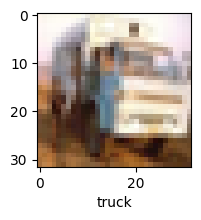

In [5]:
n= 265 #the index number for looking at the dataset
classes= ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Looking into the dataset
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, n)

In [6]:
#To normalize the values of the dataset
X_train =X_train/255
X_test= X_test/255

In [7]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"), #No. of neurons=3k
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',#becuse we have set classes of 10, we donot use
            metrics=['accuracy']
            )
ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.3040 - loss: 1.9372
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.4192 - loss: 1.6490
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.4505 - loss: 1.5513
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 72ms/step - accuracy: 0.4766 - loss: 1.4902
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 70ms/step - accuracy: 0.4947 - loss: 1.4334


In [8]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4501 - loss: 1.5768


[1.5830763578414917, 0.4397999942302704]

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print ("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.33      0.43      1000
           1       0.58      0.63      0.60      1000
           2       0.48      0.10      0.17      1000
           3       0.37      0.20      0.26      1000
           4       0.53      0.23      0.32      1000
           5       0.44      0.31      0.36      1000
           6       0.34      0.81      0.48      1000
           7       0.68      0.38      0.49      1000
           8       0.36      0.84      0.51      1000
           9       0.46      0.57      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.41     10000
weighted avg       0.48      0.44      0.41     10000



In [ ]:
#cnn
cnn= models.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation="relu"), #No. of neurons=3k
    layers.Dense(10, activation="softmix")
])